<a href="https://colab.research.google.com/github/RenaeVillarreal/BreastCancerPrediction/blob/main/BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Prediction

##About this notebook:

My name is **Renae Villarreal**, this project reads in data from a kaggle dataset. The dataset is used to determine if a tumer is malignant or benign in breast cancer. The machine learning model used in this project is SVM to determine the target diagnosis based on the dimensions of the tumor.




##Load in data from github and libraries needed.

In [11]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
from sklearn import svm, preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

# Loads the data from my github repository Database From Kaggle
data = "https://raw.githubusercontent.com/RenaeVillarreal/Machine-Learning-DataBase/main/breast-cancer.csv"
# Loads df with data
df = pd.read_csv(data)


##Data Analysis/Preprocessing Data

In [12]:
#print out top 5 to check if data loaded properly and check for any null values in dataset
print(df.head)
print(df.isnull().sum())

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

##Cleaning
1. The diagnosis column is in object type we need to convert to integar.
2. M = Malignant and B = Benign the label encoder transforms the M to a 1 and B to a 0 to enable use to execute the numerical data easily.
3. The id column is not needed for this project. We will remove.

In [13]:
#print out the data types and check is the diagnosis column was converted to integar
#diagnosis before converting
print("Diagnosis types (Before LabelEncoder)")
print(df['diagnosis'].value_counts())
print("\n")

#label encoder to convert 'M' and 'B' to 1 and 0
nt = LabelEncoder()
df['diagnosis'] = nt.fit_transform(df['diagnosis'])

#diagnosis after converting
print("Diagnosis types (After LabelEncoder)")
print(df['diagnosis'].value_counts())
print("\n")

#drop id column data not needed
df = df.drop('id',axis=1)

#check columns and types after dropping 'id'
print("New columns after removing 'id'")
print(df.columns)
print("\n")
print("New types after converitng diagnosis from object to integar")
print(df.dtypes)




Diagnosis types (Before LabelEncoder)
B    357
M    212
Name: diagnosis, dtype: int64


Diagnosis types (After LabelEncoder)
0    357
1    212
Name: diagnosis, dtype: int64


New columns after removing 'id'
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


New types after converitng diagnosis from object to integar
diagnosis                    int64
radius_mean                float64
texture_mean     

#Data Visualization
These visuals give us a better understanding of our features and how the data relates to eachother

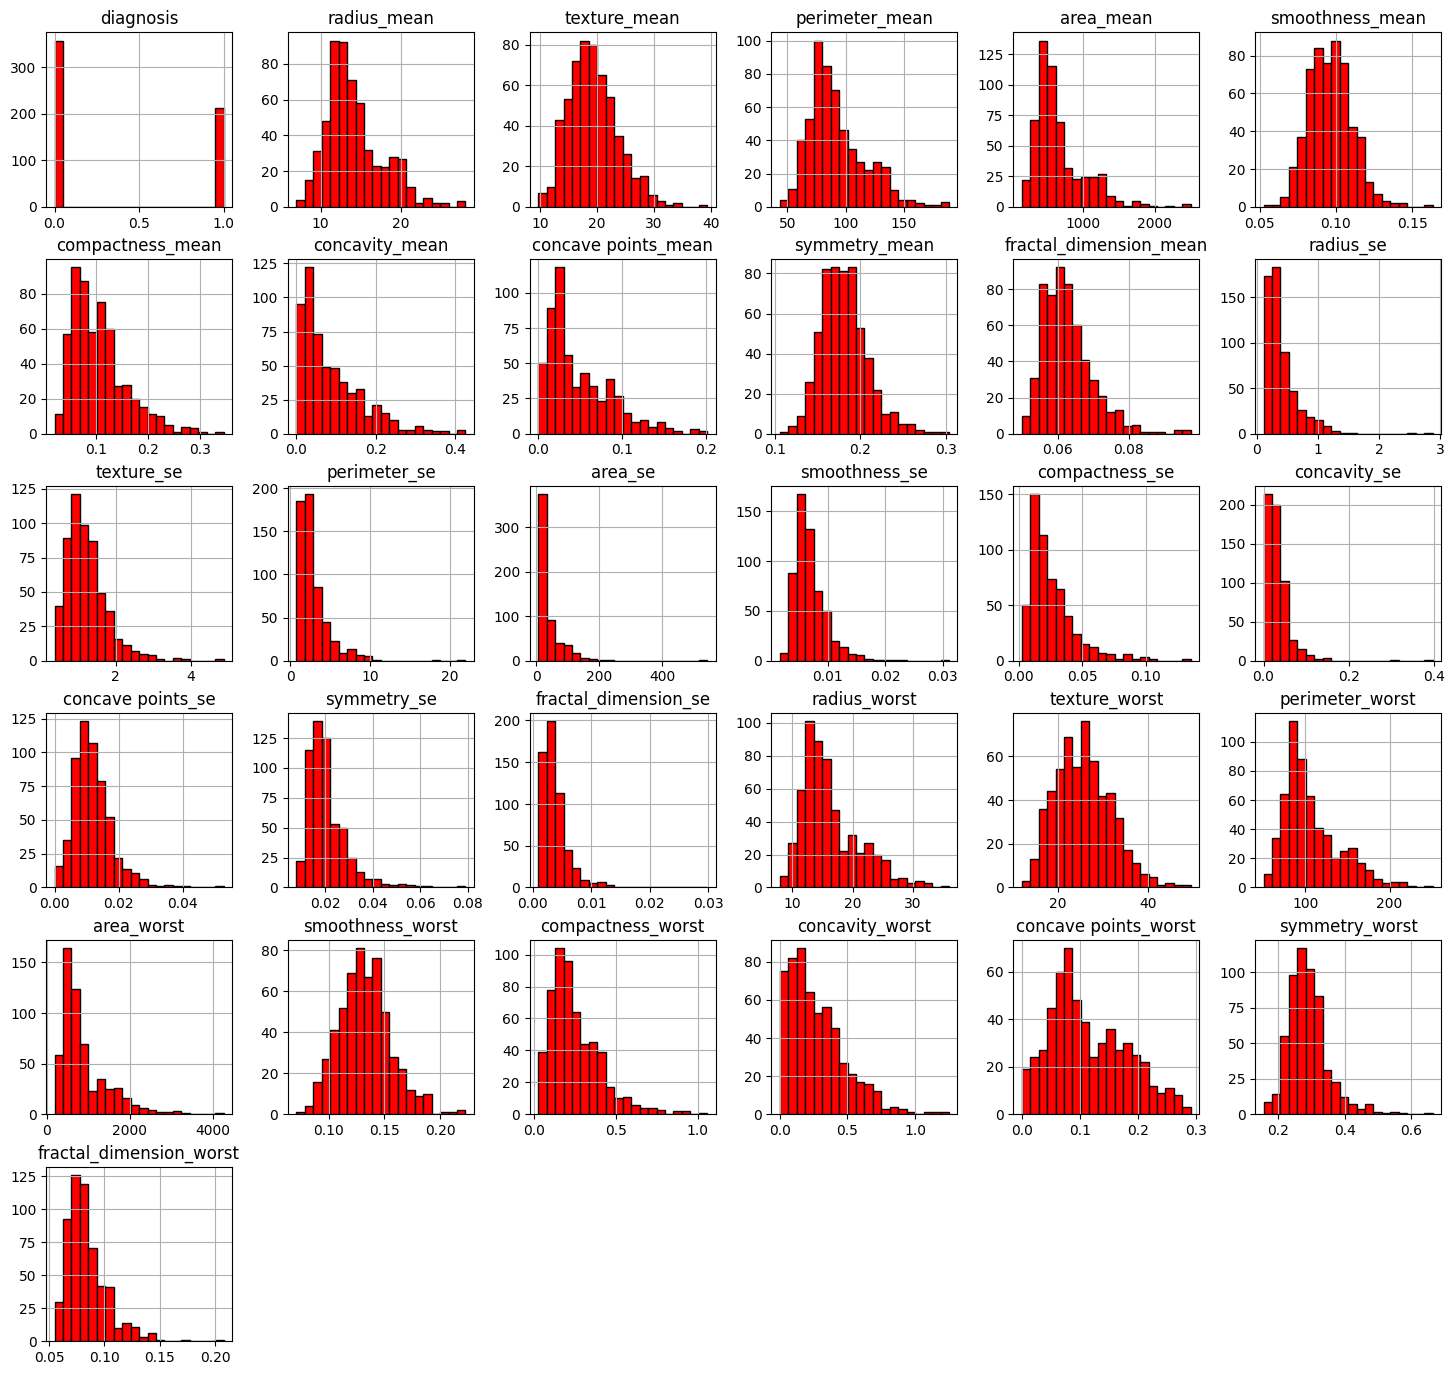

In [14]:
#creates histograms for each integar column
df.hist(figsize= (18,17),bins=20,color='red', edgecolor='black')
plt.show()

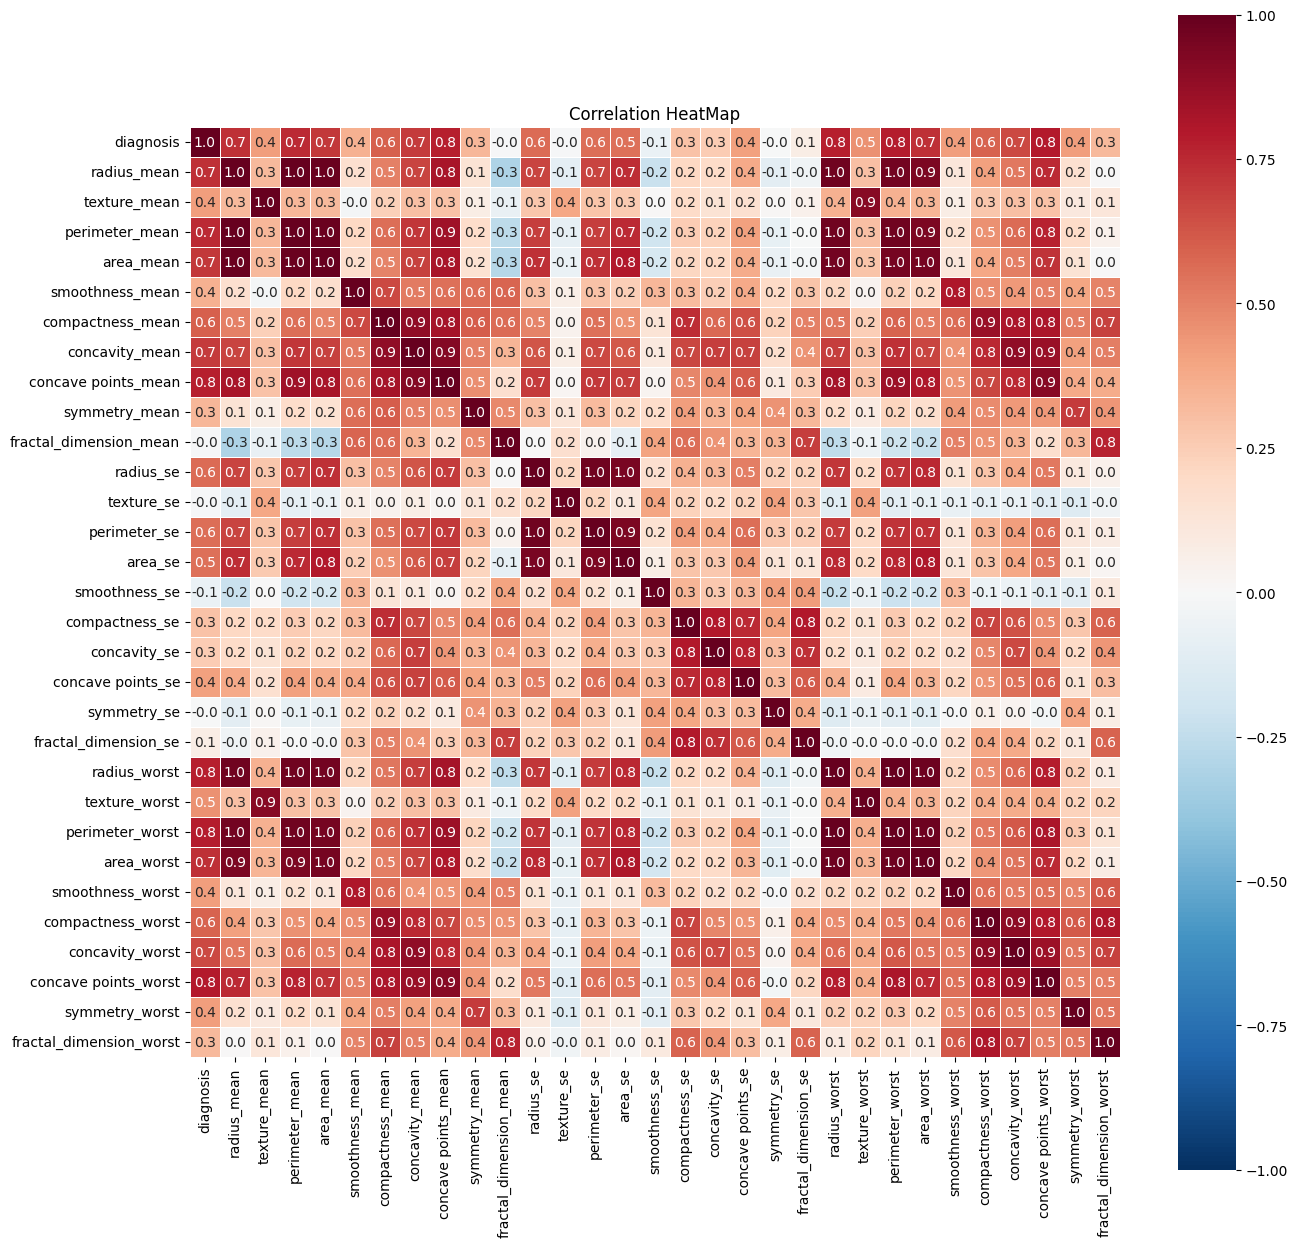

In [15]:
#correlation heatmap used to distinguish the relationship of the values
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15,15))
cmap = sn.color_palette("RdBu_r", as_cmap=True)
sn.heatmap(corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax,cmap=cmap,square=True,vmin=-1,vmax=1)
plt.title('Correlation HeatMap')
plt.show()

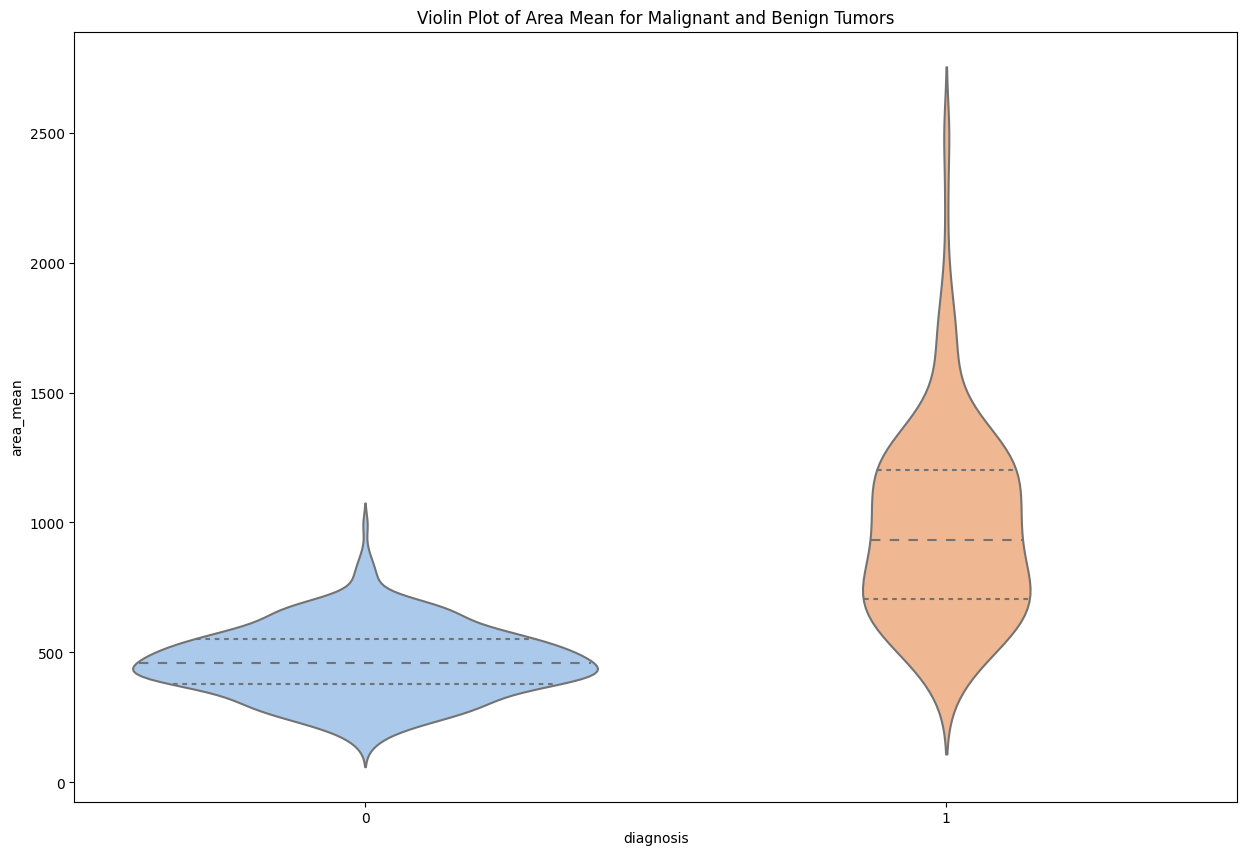

In [16]:
plt.figure(figsize=(15,10))
sn.violinplot(x='diagnosis',y='area_mean',data=df,inner='quartile',palette='pastel')
plt.title('Violin Plot of Area Mean for Malignant and Benign Tumors')
plt.show()

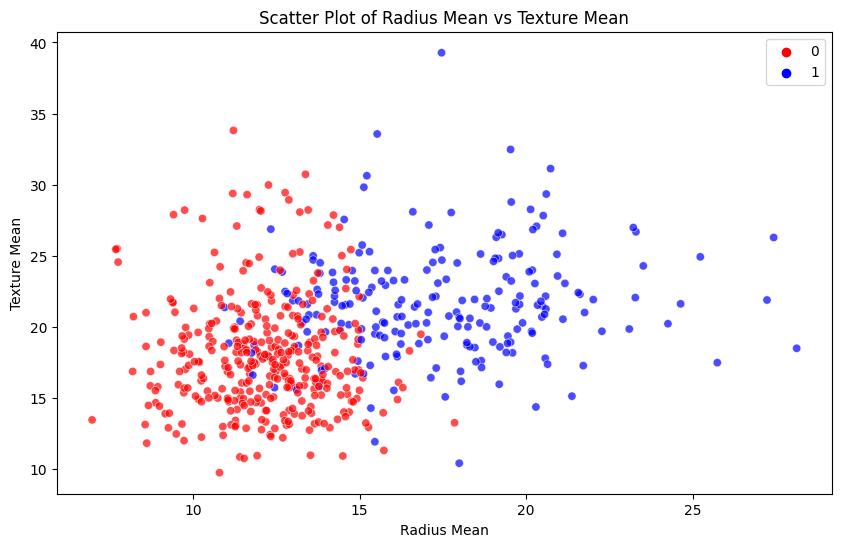

In [17]:
#explore the relationship between mean radius and mean texture through scatterplot
#useful for seperation of classes, clusters, and finding outliers
plt.figure(figsize=(10,6))
sn.scatterplot(x='radius_mean',y='texture_mean',hue='diagnosis', data=df,palette=['red','blue'],alpha=0.7)
plt.title('Scatter Plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

#1.User Kernal Scores Interavtive Tool
The user is allow to choose different kernals and see the report for each and how they are different with the dropdown
##Implementation of SVM
1. Split the data into x and y feature/target
2. Split the data into to smaller training and testing sets
3. Create our svm model
4. Train model
5. Make predictions on test set
6. Evaluate the model
7. Print output of model with scores

In [18]:
#from tabulate import tabulate
#split the data into x for features and y for target
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

#split the data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2) #,random_state=42

#kernel_dropdown = widgets.Dropdown(options=['linear','rbf'],value='linear', description='Kernel Type:')
svm_model = None
def train_svm_model(kernel_type):
  global svm_model
  svm_model = svm.SVC(kernel=kernel_type)

#create an SVM model
#svm_model = svm.SVC(kernel='linear')

#train the model
  svm_model.fit(x_train, y_train)

#make predictions on the model
  y_pred = svm_model.predict(x_test)

#evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)

#print the models results
  print(f"Accuracy: {accuracy:.2f}")
  #print("Confusion Matrix:\n",conf_matrix)
  #print("Classification Report:\n", class_report)
  print("\033[1mClassification Report:\033[0m")
  print(tabulate([line.split() for line in class_report.split('\n')], headers='firstrow', tablefmt='fancy_grid', colalign=("center",)))

  plt.figure(figsize=(8,6))
  plt.pie([accuracy, 1 - accuracy], labels=['Accuracy', ''], autopct='%1.1f%%', colors=['red', 'white'])
  plt.title('SVM Model Accuracy')
  plt.show()

  plt.figure(figsize=(8,6))
  plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
kernel_dropdown = widgets.Dropdown(options=['linear','rbf'],value='linear', description='Kernel Type:')
widgets.interactive(train_svm_model, kernel_type=kernel_dropdown)

interactive(children=(Dropdown(description='Kernel Type:', options=('linear', 'rbf'), value='linear'), Output(…

#2.User Sample Interactive Tool
The user is able to see sample data of what attributes are related to a Malignant or Benign Tumor with dropdown

In [19]:
#class to find samples on user input
def display_attributes(diagnosis_type):
  if diagnosis_type == 'Malignant':
      malignant_rows = df[df['diagnosis'] == 1]
      if not malignant_rows.empty:
        attributes = malignant_rows.sample(1)
      else:
        return "No Malignant samples available"
  elif diagnosis_type == 'Benign':
      benign_rows = df[df['diagnosis'] == 0]
      if not benign_rows.empty:
        attributes = benign_rows.sample(1)
      else:
        return "No Benign samples available"
  else:
    return "Ivalid choice"
#format text
  display_str = f"<div style='text-align: center;'><strong>Diagnosis Type:</strong> {diagnosis_type}</div><br>"
  display_str += "<div style='text-align: center;'><strong>Related Attributes:</strong></div><br>"

  if not attributes.empty:
    display_str += (attributes.to_html(index=False))
  else:
    display_str += "Please choose a type to see related attributes/data."

  display(HTML(display_str))
#show widget
diagnosis_dropdown = widgets.Dropdown(options=['Malignant', 'Benign'], value='Malignant', description='<strong>Please Select an Option:</strong>',style={'description_width':'initial'})
widgets.interactive(display_attributes, diagnosis_type=diagnosis_dropdown)

interactive(children=(Dropdown(description='<strong>Please Select an Option:</strong>', options=('Malignant', …

#3.User Input Interactive Tool
The user is able to input attributes of a tumor and our model will make a prediction using the slider or manally input a number by clicking on the presented numbers

In [20]:
input_features = df.drop(['diagnosis'], axis=1).columns.tolist()

#create sliders for user input
sliders = [widgets.FloatSlider(value=0, min=df[feature].min(), max=df[feature].max(), step=0.1, description=feature, style={'description_width':'145px'})
           for feature in input_features]
slider_grid = widgets.GridBox(sliders, layout=widgets.Layout(grid_template_columns="repeat(3,600px)"))

title_widget = widgets.HTML(value="<h3>Enter a Value for each Attribute with Slider or Manually add Value by Clicking the numbers")

header_widget = widgets.HTML(value="<h3>Hit Green Predict Button for results")
#create a button for prediction
predict_button = widgets.Button(description="Predict", style={'description_width':'initial','button_color':'lightgreen','font_weight':'bold'})

#function to handle button and prediction
def predict_button_click(button):
    #get slider input values
    slider_values = [slider.value for slider in sliders]

    #create a df with the user input
    user_input = pd.DataFrame([slider_values], columns=input_features)

    #use SVM model to make predictions
    prediction = svm_model.predict(user_input)

    prediction_result = "Malignant" if prediction[0] == 1 else "Benign"

    #show the prediction
    print("Prediction:", prediction_result)

#attach the function to the button
predict_button.on_click(predict_button_click)

#show the sliders and button
display(widgets.VBox([title_widget, header_widget, slider_grid, predict_button]))